In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [26]:
# Baca file excel
df = pd.read_excel('/content/drive/MyDrive/Portofolio/StockPricePredictionUsingLSTM/DATA RUMAH.xlsx')

In [27]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


No, Nama Rumah, Harga, Luas Bangunan (LB), Luas Tanah (LT), Jumlah Kamar Tidur (KT), Jumlah Kamar Mandi (KM), dan GRS (bisa diartikan sebagai Garasi).

In [28]:
# Pilih fitur (features) dan target
features = df[['LB', 'LT', 'KT', 'KM','GRS']]
target = df['HARGA']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
predictions = model.predict(X_test)

In [31]:
# Tampilkan koefisien dan intercept
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Koefisien: [ 1.22852541e+07  2.32681420e+07 -6.38754626e+08  5.56618859e+08
  2.47983448e+08]
Intercept: -775923911.9377832


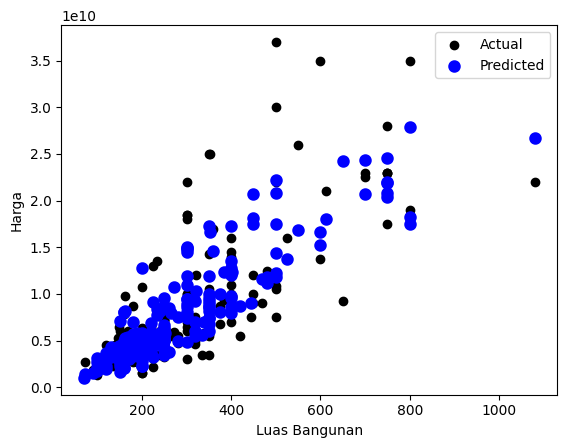

In [33]:
# Tampilkan scatter plot hasil prediksi
plt.scatter(X_test['LB'], y_test, color='black', label='Actual')
plt.scatter(X_test['LB'], predictions, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [43]:
import seaborn as sns

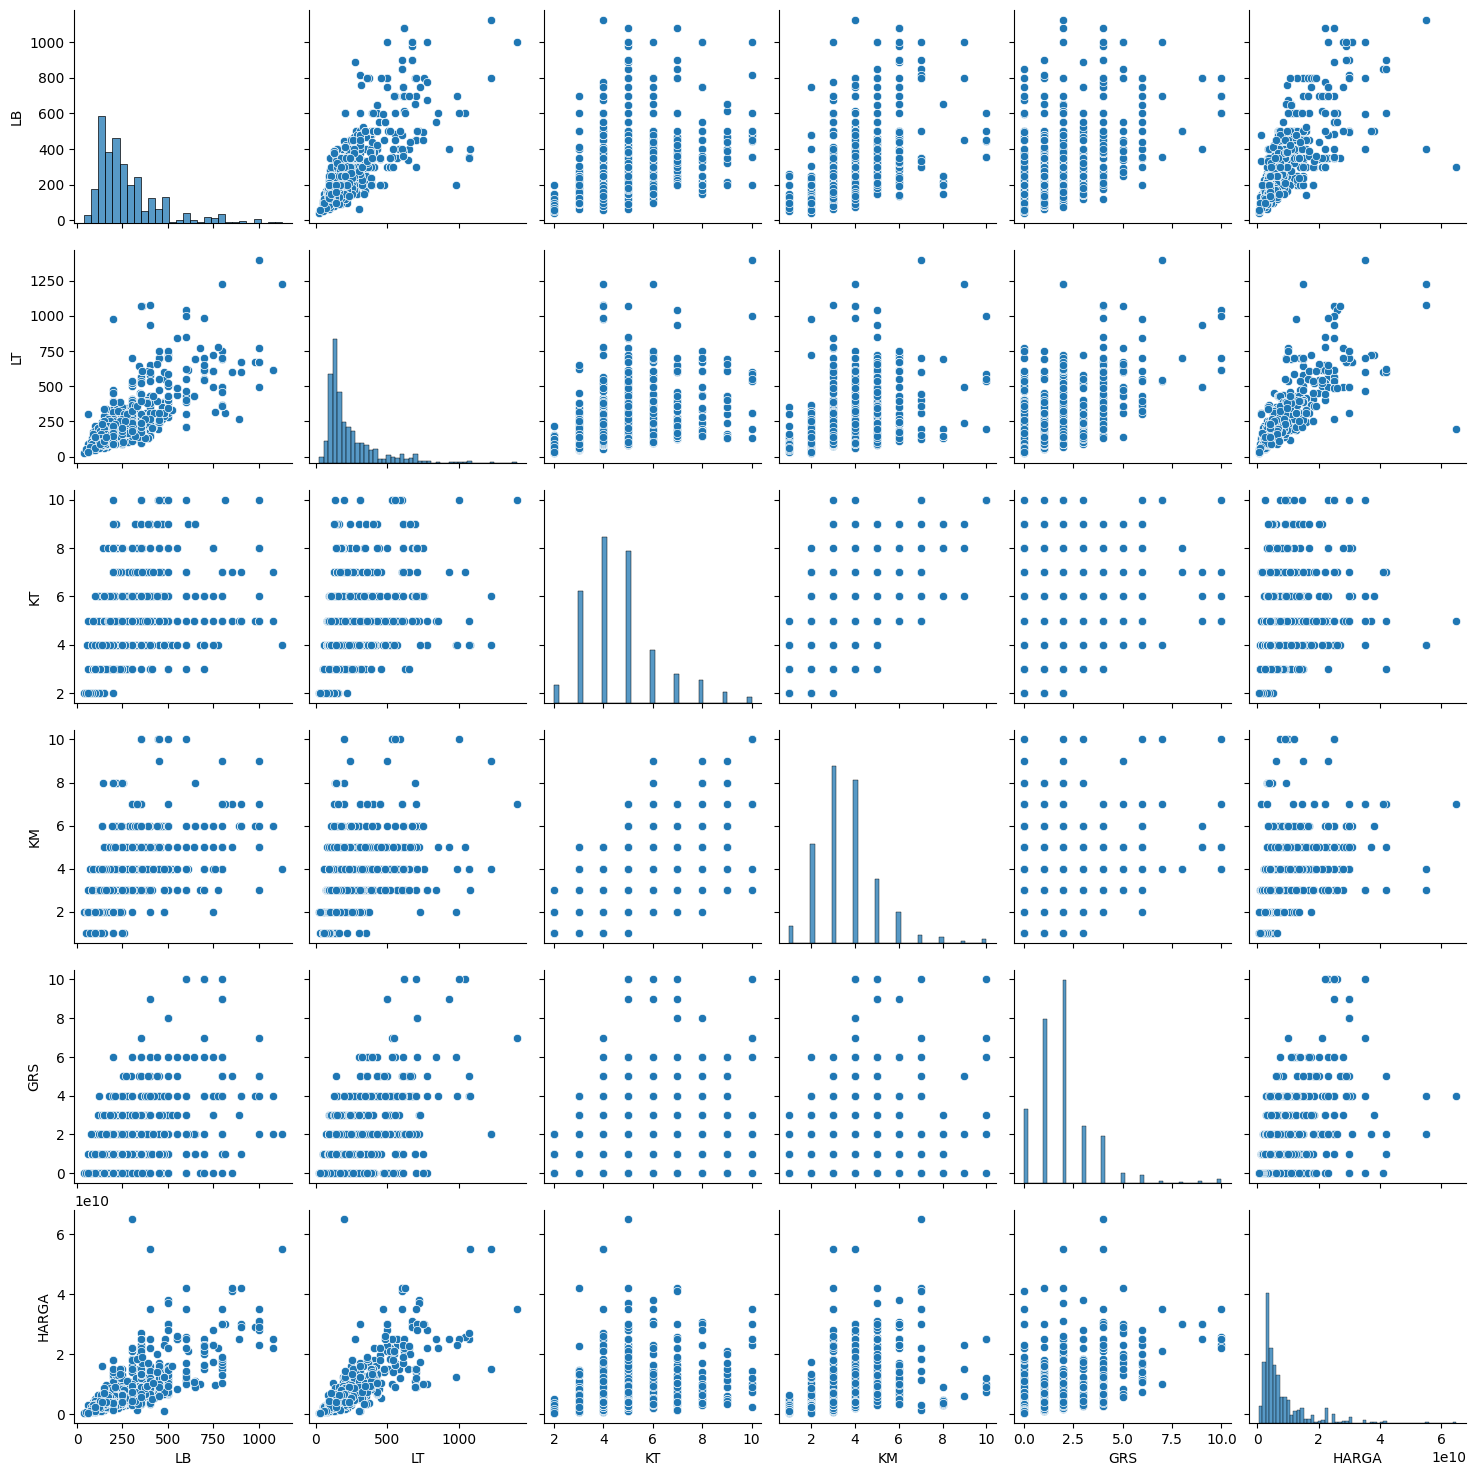

In [44]:
# Gabungkan fitur dan target menjadi satu DataFrame
data = pd.concat([features, target], axis=1)

# Tampilkan pair plot
sns.pairplot(data)
plt.show()

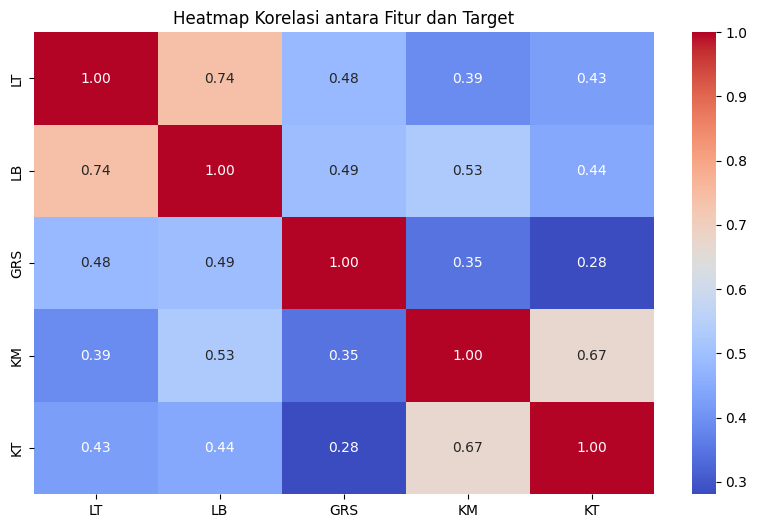

In [45]:
# Hitung koefisien korelasi antara setiap fitur dan target
correlations = features.corrwith(target)

# Urutkan fitur berdasarkan nilai korelasi
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Pilih fitur berdasarkan urutan korelasi
selected_features = features[sorted_correlations.index]

# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Fitur dan Target')
plt.show()

#Prediksi input baru

In [35]:
# Input nilai fitur dari pengguna
luas_bangunan = float(input('Masukkan Luas Bangunan: '))
luas_tanah = float(input('Masukkan Luas Tanah: '))
kamar_tidur = int(input('Masukkan Jumlah Kamar Tidur: '))
kamar_mandi = int(input('Masukkan Jumlah Kamar Mandi: '))
Garasi = int(input('Masukkan Jumlah Garasi: '))


Masukkan Luas Bangunan: 120
Masukkan Luas Tanah: 160
Masukkan Jumlah Kamar Tidur: 3
Masukkan Jumlah Kamar Mandi: 4
Masukkan Jumlah Garasi: 1


In [41]:
# Buat DataFrame untuk data baru
new_data = {'LB': luas_bangunan, 'LT': luas_tanah, 'KT': kamar_tidur, 'KM': kamar_mandi,'GRS':Garasi}
new_data_df = pd.DataFrame([new_data])

# Gunakan model untuk memprediksi harga
predicted_price = model.predict(new_data_df)
print('Prediksi Harga: Rp.', predicted_price[0])

Prediksi Harga: Rp. 4979404294.925069


In [42]:
# Format output sebagai mata uang Rupiah
formatted_price = "Rp {:,.2f}".format(predicted_price[0])

# Tampilkan hasil prediksi
print('Prediksi Harga:', formatted_price)

Prediksi Harga: Rp 4,979,404,294.93
